Column
    [0] Markdown(str)
    [1] Matplotlib(Figure)
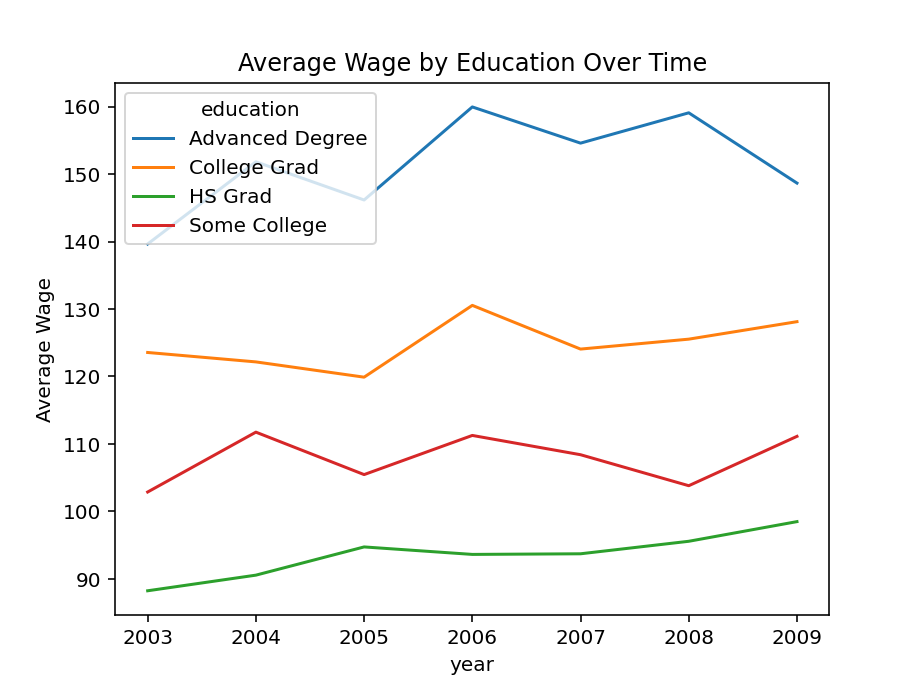

In [5]:
import panel as pn
import pandas as pd
import matplotlib.pyplot as plt

pn.extension()

# Load and clean dataset
df = pd.read_csv(r'C:\\Users\\andre\\OIM7502_SP25\\data\\Wage.csv')

# Clean the 'education' column
df['education'] = (
    df['education']
    .str.replace(r'^\d+\.\s*<*\s*', '', regex=True)  # remove leading numbers and optional "<"
    .str.replace('<', '')                            # remove any remaining "<" symbols
    .str.strip()                                     # trim leading/trailing spaces
)

# Static line plot showing wage trend by education
def trend_plot():
    avg_wage = df.groupby(['year', 'education'])['wage'].mean().unstack()
    fig, ax = plt.subplots()
    avg_wage.plot(ax=ax)
    ax.set_title("Average Wage by Education Over Time")
    ax.set_ylabel("Average Wage")
    plt.close(fig)
    return fig

# Display the chart
pn.Column("## Wage Trends by Education Over Time", trend_plot()).servable()